## Cohort Analysis for New & Returning Users

In [30]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_white'
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the csv data & get the basic idea on it
df = pd.read_csv('cohorts.csv')
print(df.shape)
df.head(10)

(30, 5)


,Date,New users,Returning users,Duration Day 1,Duration Day 7
0,25/10/2023,3461,1437,202.156977,162.523809
1,26/10/2023,3777,1554,228.631944,258.147059
2,27/10/2023,3100,1288,227.185841,233.550000
3,28/10/2023,2293,978,261.079545,167.357143
4,29/10/2023,2678,1082,182.567568,304.350000
5,30/10/2023,3748,1532,240.543956,210.900000
6,31/10/2023,3943,1603,184.194444,223.463415
7,01/11/2023,3568,1538,154.312925,180.655172
8,02/11/2023,3871,1540,188.531250,223.137931
9,03/11/2023,3772,1545,189.689394,81.705882


In [4]:
# check the data types
df.dtypes

Date                object
New users            int64
Returning users      int64
Duration Day 1     float64
Duration Day 7     float64
dtype: object

The Date column is in object (string) format. For effective analysis, especially in cohort analysis, we should convert this to a datetime format

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Date'].dtypes

dtype('<M8[ns]')

In [9]:
df.describe()

,New users,Returning users,Duration Day 1,Duration Day 7
count,30.000000,30.000000,30.000000,30.000000
mean,3418.166667,1352.866667,208.259594,136.037157
std,677.407486,246.793189,64.730830,96.624319
min,1929.000000,784.000000,59.047619,0.000000
25%,3069.000000,1131.500000,182.974287,68.488971
50%,3514.500000,1388.000000,206.356554,146.381667
75%,3829.500000,1543.750000,230.671046,220.021875
max,4790.000000,1766.000000,445.872340,304.350000


In [17]:
#Lets analyze the trend of new users & returning users over time
fig = go.Figure()

#New users
fig.add_trace(go.Scatter(x=df['Date'], y=df['New users'], mode='lines+markers', name='New Users'))

#Returning users
fig.add_trace(go.Scatter(x=df['Date'], y=df['Returning users'], mode='lines+markers', name='Returning Users'))

#Update layout
fig.update_layout(title='Trends of New and Returning users overtime', 
                 xaxis_title = 'Date',
                 yaxis_title = 'Number of users')
fig.show()

In [29]:
#Lets analyze the trend of duration over time
fig1 = px.line(data_frame=df, x='Date', y=['Duration Day 1', 'Duration Day 7'], markers=True, labels={'value':'Duration'})
fig1.update_layout(title='Trends of Duration (Day 1 and Day 7) over time', xaxis_title='Date', yaxis_title='Duration', xaxis=dict(tickangle=-45))
fig1.show()

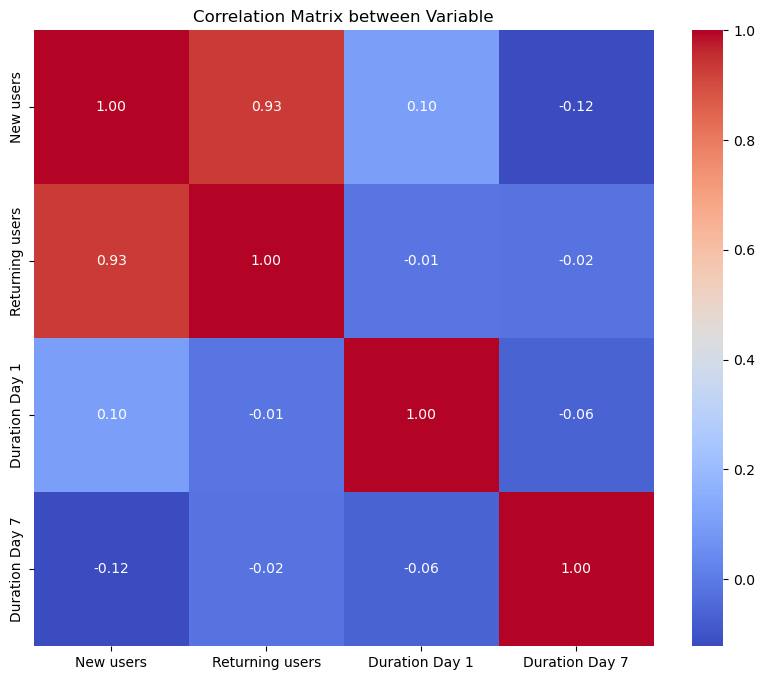

In [32]:
# let’s have a look at the correlation between the variables
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Variable')
plt.show()

The strongest correlation is between the number of new and returning users, indicating a potential trend of new users converting to returning users.

## Cohort Analysis for Weekly trend

In [39]:
# grouping data by week
df['Week']=df['Date'].dt.isocalendar().week

#calculating weekly average
weekly_avg = df.groupby('Week').agg({
    'New users' : 'mean',
    'Returning users' : 'mean',
    'Duration Day 1' : 'mean',
    'Duration Day 7' : 'mean'
}).reset_index()
weekly_avg.head()

,Week,New users,Returning users,Duration Day 1,Duration Day 7
0,43,3061.800000,1267.800000,220.324375,225.185602
1,44,3503.571429,1433.142857,189.088881,168.723200
2,45,3297.571429,1285.714286,198.426524,143.246721
3,46,3222.428571,1250.000000,248.123542,110.199609
4,47,4267.750000,1616.250000,174.173330,0.000000


In [45]:
#weekly average of the new and returning users 
fig3 = px.line(data_frame=weekly_avg, x='Week', y=['New users', 'Returning users'], markers=True, 
                labels={'value':'Average number of users'},title='Weekly Average of New vs. Returning Users')
fig3.update_xaxes(title='Week of the Year')
fig3.update_yaxes(title='Average number of users')
fig3.show()

In [50]:
#weekly average of duration
fig4=px.line(data_frame=weekly_avg, x='Week', y=['Duration Day 1', 'Duration Day 7'], markers=True,
            labels={'value':'Average Duartion'}, title='Weekly average of duration (Day 1 vs Day 7)')
fig4.update_xaxes(title='Duartion')
fig4.update_yaxes(title='Week of the Year')
fig4.show()

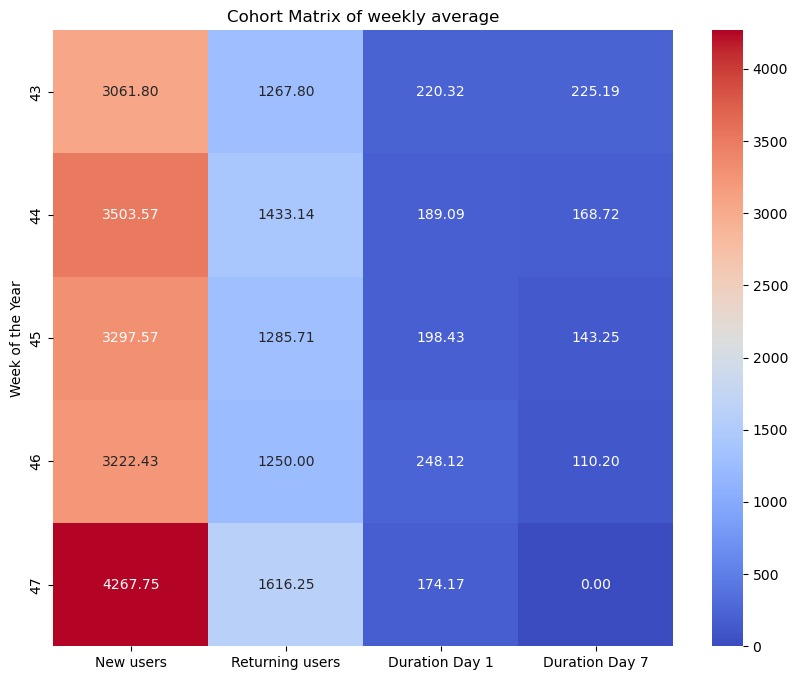

In [51]:
#let’s create a cohort chart to understand the cohort matrix of weekly averages
cohort_matrix = weekly_avg.set_index('Week')
plt.figure(figsize=(10,8))
sns.heatmap(cohort_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cohort Matrix of weekly average')
plt.ylabel('Week of the Year')
plt.show()

### Conclusion

We can see that the number of new users and returning users fluctuates from week to week. Notably, there was a significant increase in both new and returning users in Week 47. The average duration of user engagement on Day 1 and Day 7 varies across the weeks. The durations do not follow a consistent pattern about the number of new or returning users, suggesting that other factors might be influencing user engagement.